## Methode Machine learning pour savoir si une image est conforme ou non

### Preparation des données : création des ROIS

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_and_display_regions(rectangles, image_path, cols=5, figsize=(15, 20)):
    """
    Extrait et affiche les régions d'intérêt à partir d'une liste de rectangles
    
    Parameters:
    - rectangles: Liste de dictionnaires avec les clés 'x', 'y', 'width', 'height'
    - image_path: Chemin vers l'image source
    - cols: Nombre de colonnes pour l'affichage (défaut: 5)
    - figsize: Taille de la figure matplotlib (défaut: (15, 20))
    """
    
    # Charger l'image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return
    
    # Convertir BGR vers RGB pour matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Calculer le nombre de lignes nécessaires
    rows = (len(rectangles) + cols - 1) // cols
    
    # Créer la figure
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(f'Régions extraites - {len(rectangles)} zones détectées', fontsize=16, fontweight='bold')
    
    # S'assurer que axes est toujours un tableau 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Extraire et afficher chaque région
    for i, rect in enumerate(rectangles):
        row = i // cols
        col = i % cols
        
        # Extraire la région
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites de l'image
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraire la région d'intérêt
        roi = image_rgb[y:y_end, x:x_end]
        
        # Afficher la région
        ax = axes[row, col]
        ax.imshow(roi)
        ax.set_title(f'ROI {i+1}\n({x},{y}) {w}×{h}', fontsize=10)
        ax.axis('off')
        
        # Afficher les dimensions de la région extraite
        print(f"ROI {i+1:2d}: Position({x:4d},{y:4d}) Taille({w:3d}×{h:3d}) → Extrait({roi.shape[1]:3d}×{roi.shape[0]:3d})")
    
    # Masquer les axes inutilisés
    total_plots = rows * cols
    for i in range(len(rectangles), total_plots):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

def save_extracted_rois(rectangles, image_path, output_folder="extracted_rois"):
    """
    Extrait les régions d'intérêt et les sauvegarde dans un dossier
    
    Parameters:
    - rectangles: Liste de dictionnaires avec les clés 'x', 'y', 'width', 'height'
    - image_path: Chemin vers l'image source
    - output_folder: Nom du dossier de sortie (défaut: "extracted_rois")
    
    Returns:
    - Liste des chemins des fichiers sauvegardés
    """
    
    # Charger l'image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return []
    
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"📁 Dossier '{output_folder}' créé")
    
    # Extraire le nom de base de l'image pour le naming
    #base_name = os.path.splitext(os.path.basename(image_path))[0]
    base_name = "image"
    
    saved_files = []
    
    print(f"💾 Sauvegarde des ROIs dans '{output_folder}'...")
    
    # Extraire et sauvegarder chaque région
    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites de l'image
        x = max(0, x)
        y = max(0, y)
        x_end = min(image.shape[1], x + w)
        y_end = min(image.shape[0], y + h)
        
        # Extraire la région d'intérêt
        roi = image[y:y_end, x:x_end]
        
        # Créer le nom du fichier
        filename = f"{base_name}_roi_{i+1:02d}.jpg"
        filepath = os.path.join(output_folder, filename)
        
        # Sauvegarder l'image
        success = cv2.imwrite(filepath, roi)
        
        if success:
            saved_files.append(filepath)
            print(f"✅ ROI {i+1:2d}: {filename} ({roi.shape[1]}×{roi.shape[0]} pixels)")
        else:
            print(f"❌ Erreur lors de la sauvegarde de ROI {i+1}")
    
    print(f"\n🎉 {len(saved_files)}/{len(rectangles)} ROIs sauvegardées avec succès!")
    print(f"📂 Dossier: {os.path.abspath(output_folder)}")
    
    return saved_files

def extract_display_and_save(rectangles, image_path, output_folder="extracted_rois", cols=5, figsize=(15, 20)):
    """
    Fonction combinée qui affiche ET sauvegarde les ROIs
    
    Parameters:
    - rectangles: Liste de dictionnaires avec les clés 'x', 'y', 'width', 'height'
    - image_path: Chemin vers l'image source
    - output_folder: Nom du dossier de sortie (défaut: "extracted_rois")
    - cols: Nombre de colonnes pour l'affichage (défaut: 5)
    - figsize: Taille de la figure matplotlib (défaut: (15, 20))
    
    Returns:
    - Tuple (figure_matplotlib, liste_fichiers_sauvegardés)
    """
    
    # Afficher les ROIs
    #fig = extract_and_display_regions(rectangles, image_path, cols, figsize)
    
    # Sauvegarder les ROIs
    saved_files = save_extracted_rois(rectangles, image_path, output_folder)
    
    return saved_files

def extract_regions_as_array(rectangles, image_path):
    """
    Extrait les régions et les retourne comme un tableau numpy
    
    Returns:
    - Liste des régions extraites (images numpy)
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image '{image_path}'")
        return []
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    regions = []
    
    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        
        # Vérifier les limites
        x = max(0, x)
        y = max(0, y)
        x_end = min(image_rgb.shape[1], x + w)
        y_end = min(image_rgb.shape[0], y + h)
        
        # Extraire la région
        roi = image_rgb[y:y_end, x:x_end]
        regions.append(roi)
    
    return regions

# ============================================================================
# EXEMPLE D'UTILISATION COMPLET
# ============================================================================

if __name__ == "__main__":
    
    # Vos rectangles détectés
    rectangles = [
        {'x': 2060, 'y': 3366, 'width': 248, 'height': 355},
        {'x': 2358, 'y': 3344, 'width': 259, 'height': 315},
        {'x': 2617, 'y': 3282, 'width': 265, 'height': 309},
        {'x': 2820, 'y': 3152, 'width': 304, 'height': 265},
        {'x': 2967, 'y': 2944, 'width': 343, 'height': 287},
        {'x': 3220, 'y': 2679, 'width': 298, 'height': 316},
        {'x': 3316, 'y': 2409, 'width': 292, 'height': 327},
        {'x': 3361, 'y': 2184, 'width': 337, 'height': 225},
        {'x': 3349, 'y': 1942, 'width': 361, 'height': 191},
        {'x': 3316, 'y': 1610, 'width': 343, 'height': 304},
        {'x': 3265, 'y': 1317, 'width': 304, 'height': 338},
        {'x': 3085, 'y': 1069, 'width': 332, 'height': 349},
        {'x': 2854, 'y': 867, 'width': 355, 'height': 360},
        {'x': 2662, 'y': 686, 'width': 305, 'height': 372},
        {'x': 2409, 'y': 641, 'width': 282, 'height': 355},
        {'x': 2116, 'y': 579, 'width': 327, 'height': 366},
        {'x': 1812, 'y': 613, 'width': 344, 'height': 299},
        {'x': 1548, 'y': 647, 'width': 349, 'height': 321},
        {'x': 1311, 'y': 737, 'width': 316, 'height': 343},
        {'x': 1069, 'y': 945, 'width': 327, 'height': 299},
        {'x': 867, 'y': 1142, 'width': 320, 'height': 333},
        {'x': 731, 'y': 1368, 'width': 321, 'height': 321},
        {'x': 602, 'y': 1621, 'width': 360, 'height': 326},
        {'x': 591, 'y': 1902, 'width': 326, 'height': 338},
        {'x': 579, 'y': 2223, 'width': 361, 'height': 287},
        {'x': 669, 'y': 2505, 'width': 350, 'height': 287},
        {'x': 816, 'y': 2747, 'width': 338, 'height': 259},
        {'x': 1002, 'y': 2938, 'width': 326, 'height': 344},
        {'x': 1232, 'y': 3158, 'width': 304, 'height': 310},
        {'x': 1503, 'y': 3287, 'width': 281, 'height': 288},
        {'x': 1773, 'y': 3299, 'width': 338, 'height': 529}
    ]
    
    # Chemin vers votre image 30mm_BonW_7.jpg
    image_path = "data/clean_image/30mm_BonW_NC_4.jpg"  # Remplacez par le chemin de votre image
    
    print("="*60)
    print("🚀 EXTRACTION ET SAUVEGARDE DES RÉGIONS D'INTÉRÊT")
    print("="*60)
    
    # OPTION 1: Afficher ET sauvegarder (recommandé)
    print("\n📋 Option 1: Affichage + Sauvegarde")
    saved_files = extract_display_and_save(
        rectangles, 
        image_path, 
        output_folder="extracted_rois", 
        cols=6, 
        figsize=(18, 25)
    )
    
    

    
    
    print("\n" + "="*60)
    print("✨ TRAITEMENT TERMINÉ !")
    print("="*60)


🚀 EXTRACTION ET SAUVEGARDE DES RÉGIONS D'INTÉRÊT

📋 Option 1: Affichage + Sauvegarde
💾 Sauvegarde des ROIs dans 'extracted_rois'...
✅ ROI  1: image_roi_01.jpg (248×355 pixels)
✅ ROI  2: image_roi_02.jpg (259×315 pixels)
✅ ROI  3: image_roi_03.jpg (265×309 pixels)
✅ ROI  4: image_roi_04.jpg (304×265 pixels)
✅ ROI  5: image_roi_05.jpg (343×287 pixels)
✅ ROI  6: image_roi_06.jpg (298×316 pixels)
✅ ROI  7: image_roi_07.jpg (292×327 pixels)
✅ ROI  8: image_roi_08.jpg (337×225 pixels)
✅ ROI  9: image_roi_09.jpg (361×191 pixels)
✅ ROI 10: image_roi_10.jpg (343×304 pixels)
✅ ROI 11: image_roi_11.jpg (304×338 pixels)
✅ ROI 12: image_roi_12.jpg (332×349 pixels)
✅ ROI 13: image_roi_13.jpg (355×360 pixels)
✅ ROI 14: image_roi_14.jpg (305×372 pixels)
✅ ROI 15: image_roi_15.jpg (282×355 pixels)
✅ ROI 16: image_roi_16.jpg (327×366 pixels)
✅ ROI 17: image_roi_17.jpg (344×299 pixels)
✅ ROI 18: image_roi_18.jpg (349×321 pixels)
✅ ROI 19: image_roi_19.jpg (316×343 pixels)
✅ ROI 20: image_roi_20.jpg (327×

### Labelisation des images 

In [6]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import os
import shutil
from pathlib import Path

# === PARAMÈTRES ===
roi_folder = "roi_images"  # Dossier contenant les ROI à trier
conforme_folder = os.path.join(roi_folder, "conforme")
non_conforme_folder = os.path.join(roi_folder, "non_conforme")

# === CRÉATION DES DOSSIERS DE CLASSEMENT ===
Path(conforme_folder).mkdir(parents=True, exist_ok=True)
Path(non_conforme_folder).mkdir(parents=True, exist_ok=True)

# === LISTE DES IMAGES À TRIER ===
images = [f for f in os.listdir(roi_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# === INTERFACE ===
class TriROI:
    def __init__(self, master):
        self.master = master
        self.master.title("Interface de tri des ROI")
        self.index = 0
        self.image_label = tk.Label(master)
        self.image_label.pack()

        # Boutons
        btn_frame = tk.Frame(master)
        btn_frame.pack(pady=10)

        btn_c = tk.Button(btn_frame, text="✅ Conforme (C)", command=self.mark_conforme, width=20)
        btn_nc = tk.Button(btn_frame, text="❌ Non Conforme (N)", command=self.mark_non_conforme, width=20)
        btn_c.pack(side=tk.LEFT, padx=10)
        btn_nc.pack(side=tk.RIGHT, padx=10)

        # Raccourcis clavier
        master.bind("<c>", lambda e: self.mark_conforme())
        master.bind("<n>", lambda e: self.mark_non_conforme())

        self.show_image()

    def show_image(self):
        if self.index >= len(images):
            self.image_label.config(text="🎉 Tri terminé.")
            return

        img_path = os.path.join(roi_folder, images[self.index])
        image = Image.open(img_path)
        image = image.resize((200, 200))  # Resize pour affichage
        self.photo = ImageTk.PhotoImage(image)

        self.image_label.config(image=self.photo)
        self.image_label.image = self.photo

    def move_image(self, destination_folder):
        src = os.path.join(roi_folder, images[self.index])
        dst = os.path.join(destination_folder, images[self.index])
        shutil.move(src, dst)
        self.index += 1
        self.show_image()

    def mark_conforme(self):
        self.move_image(conforme_folder)

    def mark_non_conforme(self):
        self.move_image(non_conforme_folder)

# === LANCEMENT ===
if __name__ == "__main__":
    root = tk.Tk()
    app = TriROI(root)
    root.mainloop()


### Entrainement du model pour détecter un chiffre manquant

Epoch 1/10


7/7 [==============================] - 4s 105ms/step - loss: 0.7140 - accuracy: 0.4848 - val_loss: 0.6900 - val_accuracy: 0.5200
Epoch 2/10
7/7 [==============================] - 0s 34ms/step - loss: 0.6726 - accuracy: 0.5303 - val_loss: 0.6472 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 0s 32ms/step - loss: 0.6135 - accuracy: 0.7323 - val_loss: 0.5712 - val_accuracy: 0.9600
Epoch 4/10
7/7 [==============================] - 0s 33ms/step - loss: 0.4927 - accuracy: 0.8434 - val_loss: 0.4887 - val_accuracy: 0.8000
Epoch 5/10
7/7 [==============================] - 0s 28ms/step - loss: 0.3821 - accuracy: 0.8737 - val_loss: 0.3163 - val_accuracy: 0.8400
Epoch 6/10
7/7 [==============================] - 0s 28ms/step - loss: 0.2653 - accuracy: 0.8838 - val_loss: 0.2119 - val_accuracy: 0.9600
Epoch 7/10
7/7 [==============================] - 0s 27ms/step - loss: 0.2265 - accuracy: 0.8838 - val_loss: 0.1592 - val_accuracy: 1.0000
Epoch 8/10
7/7 [========

c:\Master\Semestre 2\PI\Projet\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


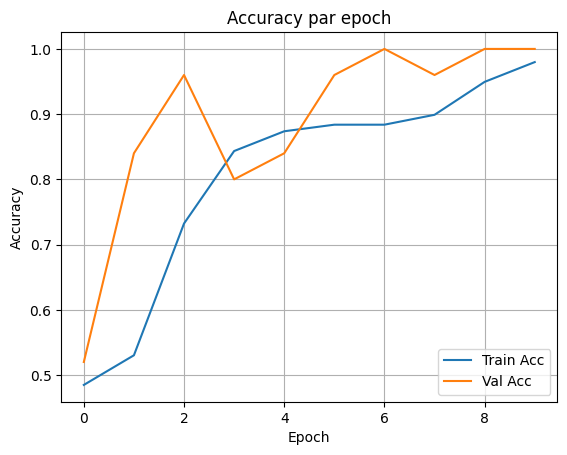

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# === PARAMÈTRES ===
img_size = 28
dataset_path = "roi_images"
classes = ["conforme", "non_conforme"]

# === CHARGEMENT DES IMAGES ===
X = []
y = []

for idx, label in enumerate(classes):
    class_folder = os.path.join(dataset_path, label)
    for file in os.listdir(class_folder):
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(class_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(idx)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # Normalisation
y = to_categorical(y, num_classes=2)

# === DIVISION TRAIN/TEST ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === MODELE CNN SIMPLE ===
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])

# === COMPILATION ===
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === ENTRAINEMENT ===
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# === EVALUATION ===
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2%}")
model.save("cnn_conformite_model.h5")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy par epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


### Methode de centres de gravités pour vérifier si une image est conforme ou non

In [3]:
import cv2
import numpy as np
import os

# Coordonnées des rectangles (inchangées)
rectangles = [
    {'x': 2060, 'y': 3366, 'width': 248, 'height': 355},
    {'x': 2358, 'y': 3344, 'width': 259, 'height': 315},
    {'x': 2617, 'y': 3282, 'width': 265, 'height': 309},
    {'x': 2820, 'y': 3152, 'width': 304, 'height': 265},
    {'x': 2967, 'y': 2944, 'width': 343, 'height': 287},
    {'x': 3220, 'y': 2679, 'width': 298, 'height': 316},
    {'x': 3316, 'y': 2409, 'width': 292, 'height': 327},
    {'x': 3361, 'y': 2184, 'width': 337, 'height': 225},
    {'x': 3349, 'y': 1942, 'width': 361, 'height': 191},
    {'x': 3316, 'y': 1610, 'width': 343, 'height': 304},
    {'x': 3265, 'y': 1317, 'width': 304, 'height': 338},
    {'x': 3085, 'y': 1069, 'width': 332, 'height': 349},
    {'x': 2854, 'y': 867, 'width': 355, 'height': 360},
    {'x': 2662, 'y': 686, 'width': 305, 'height': 372},
    {'x': 2409, 'y': 641, 'width': 282, 'height': 355},
    {'x': 2116, 'y': 579, 'width': 327, 'height': 366},
    {'x': 1812, 'y': 613, 'width': 344, 'height': 299},
    {'x': 1548, 'y': 647, 'width': 349, 'height': 321},
    {'x': 1311, 'y': 737, 'width': 316, 'height': 343},
    {'x': 1069, 'y': 945, 'width': 327, 'height': 299},
    {'x': 867, 'y': 1142, 'width': 320, 'height': 333},
    {'x': 731, 'y': 1368, 'width': 321, 'height': 321},
    {'x': 602, 'y': 1621, 'width': 360, 'height': 326},
    {'x': 591, 'y': 1902, 'width': 326, 'height': 338},
    {'x': 579, 'y': 2223, 'width': 361, 'height': 287},
    {'x': 669, 'y': 2505, 'width': 350, 'height': 287},
    {'x': 816, 'y': 2747, 'width': 338, 'height': 259},
    {'x': 1002, 'y': 2938, 'width': 326, 'height': 344},
    {'x': 1232, 'y': 3158, 'width': 304, 'height': 310},
    {'x': 1503, 'y': 3287, 'width': 281, 'height': 288},
    {'x': 1773, 'y': 3299, 'width': 338, 'height': 529}
]

# Analyse de conformité d'une ROI
def is_defective(roi, seuil_masse=1000, seuil_distance=50):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    moments = cv2.moments(thresh)
    masse = moments['m00']

    if masse < seuil_masse:
        return True, None  # vide ou trop léger

    try:
        cx = int(moments['m10'] / masse)
        cy = int(moments['m01'] / masse)
    except ZeroDivisionError:
        return True, None

    h, w = gray.shape
    gx, gy = w // 2, h // 2
    distance = np.sqrt((cx - gx)**2 + (cy - gy)**2)

    defect = distance > seuil_distance
    return defect, (cx, cy)

# Fonction principale avec rapport global
def extract_and_check_rois(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur de lecture de l'image : {image_path}")
        return

    output_dir = "extracted_rois"
    os.makedirs(output_dir, exist_ok=True)

    conform_count = 0
    total = len(rectangles)

    for i, rect in enumerate(rectangles):
        x, y, w, h = rect['x'], rect['y'], rect['width'], rect['height']
        roi = image[y:y+h, x:x+w]

        if roi.size == 0 or roi.shape[0] == 0 or roi.shape[1] == 0:
            roi = 255 * np.ones((h, w, 3), dtype=np.uint8)
            conform = False
            centroid = None
        else:
            defective, centroid = is_defective(roi)
            conform = not defective

        if conform:
            conform_count += 1

        if centroid:
            cv2.circle(roi, centroid, 5, (0, 0, 255), -1)

        label = "CONFORME" if conform else "NON_CONFORME"
        filename = f"roi_{i+1:02d}_{label}.png"
        path = os.path.join(output_dir, filename)
        cv2.imwrite(path, roi)
        

    # Résumé global
    print("\n--- BILAN FINAL ---")
    if conform_count == total:
        print("✅ Le décalque est CONFORME.")
    else:
        print("❌ Le décalque est NON CONFORME.")





### Test des 2 méthode : ML et centre de gravité 

In [16]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# === PARAMÈTRES ===
IMG_SIZE = 28
MODEL_PATH = "cnn_conformite_model.h5"
CLASS_NAMES = ["conforme", "non_conforme"]
CONFIDENCE_THRESHOLD = 0.7  # Seuil de confiance

def load_and_prepare_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0
    return img.reshape(1, IMG_SIZE, IMG_SIZE, 1)

def main(folder_path):
    model = load_model(MODEL_PATH)
    is_non_conforme = False  # Drapeau pour la conclusion finale

    print("\n📊 Analyse des ROI...\n")

    for filename in sorted(os.listdir(folder_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            filepath = os.path.join(folder_path, filename)
            img_input = load_and_prepare_image(filepath)

            if img_input is None:
                print(f"{filename} : image non valide")
                continue

            prediction = model.predict(img_input, verbose=0)
            class_index = np.argmax(prediction)
            confidence = prediction[0][class_index]

            result = CLASS_NAMES[class_index]
            confidence_str = f"{confidence:.2%}"

            if result == "non_conforme" and confidence >= CONFIDENCE_THRESHOLD:
                print(f"{filename} ➤ ❌ {result.upper()} ({confidence_str})")
                is_non_conforme = True
            else:
                print(f"{filename} ➤ ✅ {result.upper()} ({confidence_str})")

    print("\n🧾 Conclusion globale Machine learning :")
    if is_non_conforme:
        print("❌ L'image est jugée NON CONFORME.")
    else:
        print("✅ L'image est jugée CONFORME.")

# === Point d'entrée ===
folder_path = "extracted_rois"
if os.path.isdir(folder_path):
    main(folder_path)
else:
    print("Erreur : le dossier n'existe pas.")



print("------------------------Methode centre de gravité ------------------")
# Exemple d’appel
extract_and_check_rois("data/clean_image/30mm_BonW_9.jpg")


📊 Analyse des ROI...

image_roi_01.jpg ➤ ❌ NON_CONFORME (85.71%)
image_roi_02.jpg ➤ ✅ CONFORME (97.30%)
image_roi_03.jpg ➤ ✅ CONFORME (98.82%)
image_roi_04.jpg ➤ ✅ CONFORME (93.65%)
image_roi_05.jpg ➤ ✅ CONFORME (96.31%)
image_roi_06.jpg ➤ ✅ CONFORME (99.78%)
image_roi_07.jpg ➤ ✅ CONFORME (79.74%)
image_roi_08.jpg ➤ ✅ CONFORME (99.29%)
image_roi_09.jpg ➤ ✅ CONFORME (93.93%)
image_roi_10.jpg ➤ ✅ CONFORME (99.93%)
image_roi_11.jpg ➤ ✅ CONFORME (96.90%)
image_roi_12.jpg ➤ ✅ CONFORME (99.48%)
image_roi_13.jpg ➤ ✅ CONFORME (99.46%)
image_roi_14.jpg ➤ ✅ CONFORME (99.51%)
image_roi_15.jpg ➤ ✅ CONFORME (99.73%)
image_roi_16.jpg ➤ ✅ CONFORME (99.64%)
image_roi_17.jpg ➤ ✅ CONFORME (69.22%)
image_roi_18.jpg ➤ ✅ CONFORME (80.35%)
image_roi_19.jpg ➤ ✅ CONFORME (99.63%)
image_roi_20.jpg ➤ ✅ CONFORME (99.64%)
image_roi_21.jpg ➤ ✅ CONFORME (98.39%)
image_roi_22.jpg ➤ ✅ CONFORME (99.56%)
image_roi_23.jpg ➤ ✅ CONFORME (99.51%)
image_roi_24.jpg ➤ ✅ CONFORME (99.86%)
image_roi_25.jpg ➤ ✅ CONFORME (99.73%